In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ipo=pd.read_csv('ipo_data.csv')

### Study of IPO Markets

In [3]:
ipo.head(3)

,Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Change Opening,$ Change Close
0,2010-01-22,Cellu Tissue Holdings,CLU,Goldman Sachs/J.P. Morgan/BofA Merrill Lynch,13.0,12.30,11.90,-8.46,-0.70,-1.10
1,2010-01-22,Chesapeake Lodging Trust,CHSP,J.P. Morgan/Dutsche Bank/FBR,20.0,19.25,19.00,-5.00,-0.75,-1.00
2,2010-01-22,Symetra Financial,SYA,BofA/JP Morgan/Goldman Sachs/Barclays Capital,12.0,12.70,12.75,6.25,0.70,0.75


Checking for Null values in dataset

In [4]:
ipo.isnull().any()

Date                        False
Issuer                      False
Symbol                      False
Lead/Joint-Lead Managers    False
Offer Price                 False
Opening Price               False
1st Day Close               False
1st Day % Px Chng            True
$ Change Opening            False
$ Change Close              False
dtype: bool

<i>1st Day % Px Chng</i> contains null values lets get rid of that

In [5]:
ipo[ipo['1st Day % Px Chng'].isnull()==True]

,Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Change Opening,$ Change Close
1536,2018-06-28,Entera Bio Ltd.,ENTXW,Maxim Group,0.0,0.96,0.81,NaN,0.96,0.81


updaing the values at index <i>'1536'</i>

In [6]:
ipo.loc[1536,'Offer Price']=ipo.loc[1536,'Opening Price']
ipo.loc[1536,'$ Change Opening']=ipo.loc[1536,'Opening Price']-ipo.loc[1536,'Offer Price']
ipo.loc[1536,'$ Change Close']=ipo.loc[1536,'1st Day Close']-ipo.loc[1536,'Offer Price']
ipo.loc[1536,'1st Day % Px Chng']=ipo.loc[1536,'$ Change Close']*100/ipo.loc[1536,'Offer Price']

In [7]:
ipo.loc[1536]

Date                              2018-06-28
Issuer                      Entera Bio Ltd. 
Symbol                                 ENTXW
Lead/Joint-Lead Managers        Maxim Group 
Offer Price                             0.96
Opening Price                           0.96
1st Day Close                           0.81
1st Day % Px Chng                    -15.625
$ Change Opening                         0.0
$ Change Close                         -0.15
Name: 1536, dtype: object

In [8]:
ipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2080 entries, 0 to 2079
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      2080 non-null   object 
 1   Issuer                    2080 non-null   object 
 2   Symbol                    2080 non-null   object 
 3   Lead/Joint-Lead Managers  2080 non-null   object 
 4   Offer Price               2080 non-null   float64
 5   Opening Price             2080 non-null   float64
 6   1st Day Close             2080 non-null   float64
 7   1st Day % Px Chng         2080 non-null   float64
 8   $ Change Opening          2080 non-null   float64
 9   $ Change Close            2080 non-null   float64
dtypes: float64(6), object(4)
memory usage: 162.6+ KB


In [9]:
ipo['Date']=pd.to_datetime(ipo['Date'])

<AxesSubplot:title={'center':'1st Day IPO percentage Change'}, xlabel='Date'>

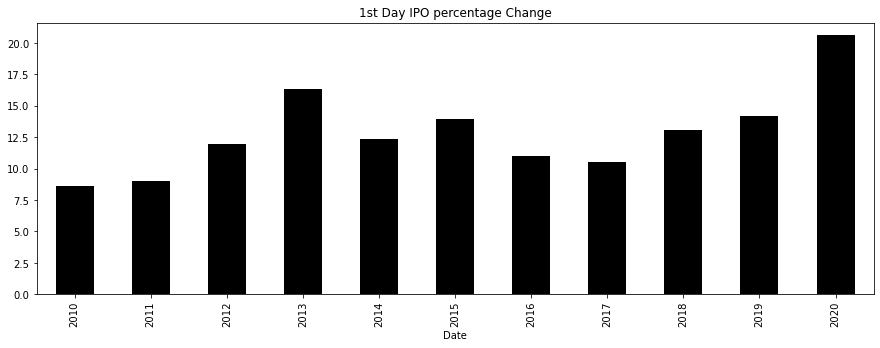

In [10]:
ipo.groupby(ipo['Date'].dt.year)['1st Day % Px Chng'].mean().plot(kind='bar',figsize=(15,5),color='k',title='1st Day IPO percentage Change')

In [11]:
ipo['1st Day % Px Chng'].describe()

count    2080.000000
mean       13.245906
std        27.766913
min       -41.080000
25%         0.000000
50%         2.615000
75%        20.177500
max       249.380000
Name: 1st Day % Px Chng, dtype: float64

<AxesSubplot:>

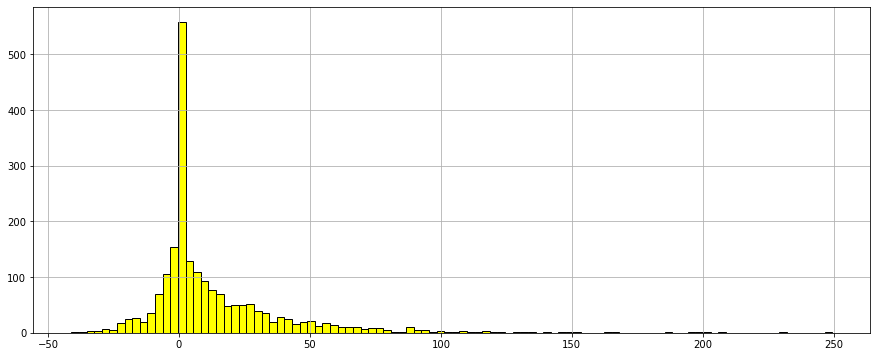

In [12]:
ipo['1st Day % Px Chng'].hist(figsize=(15,6),bins=100,color='yellow',edgecolor='black')

If we had purchased shares of all ipo from 2010 to 2020 at offer price one could have made a profit of 13.246 % 

But we cannot but all ipo shares at offer price 

<b>Feature Extraction - <i>Change open to close%</i></b>

In [13]:
ipo['Chng Open to Close%']=(ipo['$ Change Close']-ipo['$ Change Opening'])*100/ipo['Opening Price']
ipo.sample(3)

,Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Change Opening,$ Change Close,Chng Open to Close%
1513,2018-06-19,Thunder Bridge Acquisition,TBRGU,Cantor/ CLSA,10.0,10.05,10.05,0.5,0.05,0.05,0.000000
190,2011-03-25,Prime Acquisition,PACQU,Chardan Capital Markets,10.0,10.00,10.00,0.0,0.00,0.00,0.000000
953,2014-12-11,LendingClub,LC,Morgan Stanley/ Goldman Sachs/ Credit Suisse/ ...,15.0,24.98,23.43,56.2,9.98,8.43,-6.204964


In [14]:
ipo['Chng Open to Close%'].describe()

count    2080.000000
mean        0.924958
std        12.439715
min       -49.281222
25%        -3.244043
50%         0.000000
75%         3.285727
max       217.365269
Name: Chng Open to Close%, dtype: float64

In [15]:
ipo[ipo['Chng Open to Close%']<-49]

,Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Change Opening,$ Change Close,Chng Open to Close%
42,2010-05-05,Douglas Dynamics,PLOW,Credit Suisse/ Oppenheimer,11.25,22.26,11.29,0.36,11.01,0.04,-49.281222


In [16]:
ipo[ipo['Chng Open to Close%']<-40]

,Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Change Opening,$ Change Close,Chng Open to Close%
42,2010-05-05,Douglas Dynamics,PLOW,Credit Suisse/ Oppenheimer,11.25,22.26,11.29,0.36,11.01,0.04,-49.281222
256,2011-07-20,Zillow,Z,Citi,20.00,60.00,35.77,78.85,40.00,15.77,-40.383333


In [17]:
ipo.loc[256,'Date']=pd.to_datetime('2015-08-03')
ipo.loc[256,'Opening Price']=27.650
ipo.loc[256,'1st Day Close']=27.740
ipo.loc[256,'Offer Price']=ipo.loc[256,'Opening Price']
ipo.loc[256,'$ Change Opening']=ipo.loc[256,'Opening Price']-ipo.loc[1536,'Offer Price']
ipo.loc[256,'$ Change Close']=ipo.loc[256,'1st Day Close']-ipo.loc[1536,'Offer Price']
ipo.loc[256,'1st Day % Px Chng']=ipo.loc[256,'$ Change Close']*100/ipo.loc[1536,'Offer Price']
ipo.loc[256,'Chng Open to Close%']=(ipo.loc[256,'$ Change Close']-ipo.loc[256,'$ Change Opening'])*100/ipo.loc[256,'Opening Price']

In [18]:
ipo[ipo['Chng Open to Close%']<-30]

,Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Change Opening,$ Change Close,Chng Open to Close%
42,2010-05-05,Douglas Dynamics,PLOW,Credit Suisse/ Oppenheimer,11.25,22.26,11.29,0.36,11.01,0.04,-49.281222
449,2013-01-15,"USA Compression Partners, LP",USAC,"Barclays Capital/ Goldman, Sachs/ J.P. Morgan/...",18.00,17.50,11.66,-35.22,-0.50,-6.34,-33.371429
1689,2019-04-03,Ruhnn Holding,RUHN,Citigroup/ UBS Investment Bank,12.50,12.50,7.85,-37.20,0.00,-4.65,-37.200000
1701,2019-04-18,Greenlane Holdings,GNLN,Cowen/Canaccord Genuity,17.00,29.00,21.10,24.12,12.00,2.00,-34.482759
1795,2019-08-01,Sundial Growers,SNDL,Cowen/ BMO Capital Markets/ Barclays,13.00,13.01,8.48,-34.77,0.01,-4.52,-34.819370
1942,2020-06-05,Applied Molecular Transport (AMTI),AMTI,BofA Securities/Jefferies/ SVB Leerink,14.00,26.00,17.98,28.43,12.00,3.98,-30.846154
1991,2020-07-17,Pandion Therapeutics Holdco,PAND,Goldman Sachs/ Morgan Stanley/ SVB Leerink/ BM...,18.00,27.00,18.10,0.56,9.00,0.10,-32.962963


In [19]:
ipo.loc[449,'1st Day Close']=17.60
ipo.loc[1795,'Opening Price']=13.02
ipo.loc[1942,'Opening Price']=25.510

In [20]:
ipo[(ipo['Chng Open to Close%']<-20)&(ipo['Chng Open to Close%']>-30)]

,Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Change Opening,$ Change Close,Chng Open to Close%
135,2010-11-23,Zogenix,ZGNX,Wells Fargo Securities/ Leerink Swann,4.0,5.00,3.98,-0.50,1.00,-0.02,-20.400000
144,2010-12-09,Bona Film Group Limited,BONA,BofA Merrill Lynch/ J.P. Morgan,8.5,8.50,6.60,-22.35,0.00,-1.90,-22.352941
223,2011-05-11,FriendFinder Network,FFN,Imperial Capital/ Ladenburg Thalmann & Co. Inc.,10.0,10.00,7.85,-21.50,0.00,-2.15,-21.500000
541,2013-06-27,Tremor Video,TRMR,Credit Suisse/ Jefferies,10.0,11.00,8.50,-15.00,1.00,-1.50,-22.727273
546,2013-07-18,UCP,UCP,Citigroup/ Deutsche Bank Securities/ Zelman Pa...,15.0,17.75,14.00,-6.67,2.75,-1.00,-21.126761
558,2013-07-25,Onconova Therapeutics,ONTX,Citigroup/ Leerink Swann,15.0,25.00,19.88,32.53,10.00,4.88,-20.480000
728,2014-03-19,Paylocity Holding,PCTY,Deutsche Bank Securities/ BofA Merrill Lynch/ ...,17.0,31.00,24.04,41.41,14.00,7.04,-22.451613
859,2014-07-31,Bio Blast Pharma Ltd.,ORPN,Oppenheimer/ Roth Capital Partners,11.0,10.90,8.40,-23.64,-0.10,-2.60,-22.935780
884,2014-09-18,Foamix Ltd.,FOMX,Barclays/ Cowen and Company,6.0,8.00,6.22,3.67,2.00,0.22,-22.250000
885,2014-09-18,ProQR Therapeutics B.V.,PRQR,Leerink Partners/ Deutsche Bank Securities,13.0,19.90,14.73,13.31,6.90,1.73,-25.979899


In [21]:
ipo.loc[135,['Offer Price','Opening Price','1st Day Close']]=[40.0,40.0,31.84]

In [22]:
ipo[ipo['Chng Open to Close%']>50]

,Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Change Opening,$ Change Close,Chng Open to Close%
311,2012-02-08,Caesars Entertainment,CZR,Credit Suisse/ Citigroup/ BofA Merrill Lynch/ ...,9.0,9.06,15.39,71.00,0.06,6.39,69.867550
690,2014-01-30,Dicerna Pharmaceuticals,DRNA,Jefferies/ Leerink Swann/ Stifel,15.0,30.00,46.00,206.67,15.00,31.00,53.333333
881,2014-09-12,ReWalk Robotics,RWLK,Barclays/ Jefferies,12.0,12.00,25.60,113.33,0.00,13.60,113.333333
1064,2015-06-26,Seres Therapeutics,MCRB,Goldman Sachs/ BofA Merrill Lynch,18.0,31.36,51.40,185.56,13.36,33.40,63.903061
1136,2015-11-20,Duluth Holdings,DLTH,William Blair/ Baird/ Raymond James/ BMO Capit...,12.0,5.15,13.36,11.33,-6.85,1.36,159.417476
1500,2018-05-24,Scholar Rock Holding,SRRK,Jefferies/ Cowen/ BMO Capital Markets,14.0,14.25,15.50,10.71,0.25,15.00,103.508772
1583,2018-09-14,Qutoutiao,QTT,Citigroup/ Deutsche Bank Securities,7.0,9.10,15.97,128.14,2.10,8.97,75.494505
1716,2019-05-09,Cortexyme,CRTX,BofA Merrill Lynch/ Credit Suisse,17.0,20.00,32.89,93.47,3.00,15.89,64.450000
1745,2019-06-13,Fiverr International,FVRR,J.P. Morgan Securities/ Citigroup,21.0,26.00,39.90,90.00,5.00,18.90,53.461538
1873,2019-12-19,Monopar Therapeutics,MNPR,JonesTrading,8.0,8.35,26.50,231.25,0.35,18.50,217.365269


In [23]:
ipo.loc[881,['Offer Price','Opening Price','1st Day Close']]=[300,300,640]
ipo.loc[1064,['Offer Price','Opening Price','1st Day Close']]=[18,28.5,51.4]
ipo.loc[1136,['Offer Price','Opening Price','1st Day Close']]=[12,13,13.65]
ipo.loc[1500,'Date']=pd.to_datetime('2018-05-25')
ipo.loc[1500,['Offer Price','Opening Price','1st Day Close']]=[14,15.21,15]
ipo.loc[1583,['Offer Price','Opening Price','1st Day Close']]=[7,91,159.7]

In [24]:
ipo[(ipo['Chng Open to Close%']>-20)&(ipo['Chng Open to Close%']<-10)][:10]

,Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Change Opening,$ Change Close,Chng Open to Close%
22,2010-03-24,Calix Networks,CALX,Goldman Sachs/Morgan Stanley,13.0,17.00,15.10,16.15,4.00,2.10,-11.176471
105,2010-10-15,Body Central,BODY,Piper Jaffray/ Jefferies & Company,13.0,14.49,13.00,0.00,1.49,0.00,-10.282954
107,2010-10-19,ShangPharma,SHP,Citi/ J.P. Morgan,15.0,15.00,12.75,-15.00,0.00,-2.25,-15.000000
118,2010-11-02,Xueda Education Group,XUE,Goldman Sachs (Asia) L.L.C.,9.5,14.30,12.50,31.58,4.80,3.00,-12.587413
119,2010-11-03,SinoTech Energy Limited,CTE,Citi/ UBS Investment Bank/ Deutsche Bank Secur...,8.5,8.50,6.86,-19.29,0.00,-1.64,-19.294118
123,2010-11-05,Primo Water,PRMW,Stifel Nicolaus Weisel,12.0,14.86,12.95,7.92,2.86,0.95,-12.853297
136,2010-11-24,SYSWIN,SYSW,Morgan Stanley,7.0,7.00,6.20,-11.43,0.00,-0.80,-11.428571
155,2010-12-16,Ventrus Biosciences,VTUS,"Rodman & Renshaw, LLC/ National Securities",6.0,7.47,6.30,5.00,1.47,0.30,-15.662651
159,2010-12-21,"Ossen Innovation Co., Ltd.",OSN,"Global Hunter Securities, LLC/ Knight Capital ...",4.5,4.74,4.25,-5.56,0.24,-0.25,-10.337553
191,2011-03-25,ServiceSource International,SREV,Morgan Stanley/ Deutsche Bank Securities,10.0,13.65,12.18,21.80,3.65,2.18,-10.769231


In [25]:
ipo['1st Day % Px Chng']=(ipo['1st Day Close']-ipo['Offer Price'])*100/ipo['Offer Price']
ipo['$ Change Opening']=ipo['Opening Price']-ipo['Offer Price']
ipo['$ Change Close']=ipo['1st Day Close']-ipo['Offer Price']
ipo['Chng Open to Close%']=(ipo['$ Change Close']-ipo['$ Change Opening'])*100/ipo['Opening Price']

In [26]:
ipo.sort_values('Date',inplace=True)
ipo.reset_index(drop=True,inplace=True)

In [27]:
ipo['Change Open-Close ($)']=ipo['$ Change Close']-ipo['$ Change Opening']

In [28]:
ipo['Chng Open to Close%'].describe()

count    2080.000000
mean        0.848080
std        11.708434
min       -49.281222
25%        -3.236597
50%         0.000000
75%         3.276815
max       217.365269
Name: Chng Open to Close%, dtype: float64

<AxesSubplot:>

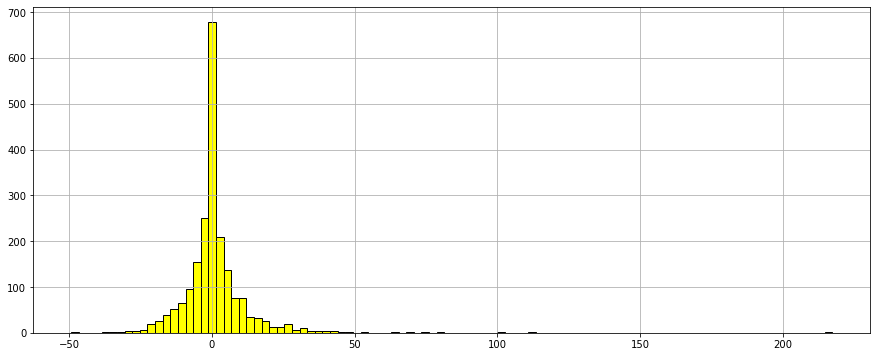

In [29]:
ipo['Chng Open to Close%'].hist(figsize=(15,6),bins=100,color='yellow',edgecolor='black')

If we had purchased shares of all ipo from 2010 to 2020 at offer price one could have made a profit of 0.85 %. 
So there is a glimmerous hope

In the histogram, we can also see that there is a lengthy tail to the right of zero.

### Feature Engineering

Features that can impact the performace of ipo markets are Recent performance of market, Prestige of Underwriters, day of the week or month of trading

In [30]:
snp=pd.read_csv('snp10_20.csv')
snp.tail(3)

,Date,Open,High,Low,Close
2689,2020-09-09,3369.82,3424.77,3366.84,3398.96
2690,2020-09-10,3412.56,3425.55,3329.25,3339.19
2691,2020-09-11,3352.70,3368.95,3310.47,3340.97


In [31]:
snp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2692 entries, 0 to 2691
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2692 non-null   object 
 1   Open    2692 non-null   float64
 2   High    2692 non-null   float64
 3   Low     2692 non-null   float64
 4   Close   2692 non-null   float64
dtypes: float64(4), object(1)
memory usage: 105.3+ KB


<b>S&P 500</b><i> Performance over past weeks</i>

In [32]:
def get_week_chng(ipo_dt):
    try:
        day_ago_idx=snp[snp['Date']==str(ipo_dt.date())].index[0]-1
        week_ago_idx=snp[snp['Date']==str(ipo_dt.date())].index[0]-8
        chng=(snp.iloc[day_ago_idx]['Close']-snp.iloc[week_ago_idx]['Close'])/snp.iloc[week_ago_idx]['Close']
        return chng*100
    except:
        print('error',ipo_dt.date())

In [33]:
ipo['SP Week Change']=ipo['Date'].map(get_week_chng)

<b>S&P 500</b><i> Past days performance</i>

In [34]:
def get_cto_per(ipo_dt):
    try:
        today_open_idx=snp[snp['Date']==str(ipo_dt.date())].index[0]
        yes_close_idx=snp[snp['Date']==str(ipo_dt.date())].index[0]-1
        chng=(snp.iloc[today_open_idx]['Open']-snp.iloc[yes_close_idx]['Close'])/snp.iloc[yes_close_idx]['Close']
        return chng*100
    except:
        print('error',ipo_dt.date())

In [35]:
ipo['SP Close to Open%']=ipo['Date'].map(get_cto_per)

In [36]:
ipo['Lead mgr']=ipo['Lead/Joint-Lead Managers'].map(lambda x:x.split('/')[0])
ipo['Lead mgr']=ipo['Lead mgr'].map(lambda x:x.strip())

In [37]:
for n in pd.DataFrame(ipo['Lead mgr'].unique(),columns=['name']).sort_values('name')['name']:
    print(n)

AMTD
AMTD Global Markets
Aegis Capital
Aegis Capital Corp
Aegis Capital Corp.
Alexander Capital
Axiom
Axiom Capital Management
B. Riley FBR
BMO Capital Markets
BTIG
Baird
Baird, BMO Capital Markets, Janney Montgomery Scott
Barclays
Barclays Capital
Benchmark
Benchmark Company
BoA Merrill Lynch
BofA
BofA Merril Lynch
BofA Merrill Lych
BofA Merrill Lync
BofA Merrill Lynch
BofA Securities
Boustead Securities
Broadband Capital Management
Broadband Capital Management LLC
Burnham Securities
C&Co
CIBC Capital Markets
CICC
Canaccord Genuity
Cantor
Cantor Fitzgerald
Cantor Fitzgerald & Co.
Chardan
Chardan Capital Markets
Cit
Citi
Citigroup
Cohen & Company Capital Markets, LLC   I-Bankers Securities
Cowen
Cowen and Company
Craig-Hallum Capital Group
Credit Suiss
Credit Suisse
Credit Suisse. Citigroup
D.A. Davidson
D.A. Davidson & Co.
DPO (Direct Public Offering)
Dawson James Securities
Deutsche Bank
Deutsche Bank Securities
Dougherty & Company
EarlyBirdCapita
EarlyBirdCapital
EarlyBirdCapital, I

In [38]:
ipo.loc[ipo['Lead mgr'].str.contains('A.G. Edwards'),'Lead mgr']='A.G. Edwards'
ipo.loc[ipo['Lead mgr'].str.contains('AG Edwards'),'Lead mgr']='A.G. Edwards'
ipo.loc[ipo['Lead mgr'].str.contains('A.G. Edwrads'),'Lead mgr']='A.G. Edwards'
ipo.loc[ipo['Lead mgr'].str.contains('AG Edwrads'),'Lead mgr']='A.G. Edwards'
ipo.loc[ipo['Lead mgr'].str.contains('AMTD'),'Lead mgr']='AMTD Global Markets'
ipo.loc[ipo['Lead mgr'].str.contains('Aegis Capital'),'Lead mgr']='Aegis Capital Corp'
ipo.loc[ipo['Lead mgr'].str.contains('Alexander Capital'),'Lead mgr']='Alexander Capital L.P.'
ipo.loc[ipo['Lead mgr'].str.contains('Anderson & Strudrick'),'Lead mgr']='Anderson & Strudrick Inc'
ipo.loc[ipo['Lead mgr'].str.contains('Axiom'),'Lead mgr']='Axiom Capital Management, Inc'
ipo.loc[ipo['Lead mgr'].str.contains('BBVA'),'Lead mgr']='Banco Bilbao Vizcaya Argentaria'
ipo.loc[ipo['Lead mgr'].str.contains('BTIG'),'Lead mgr']='BTIG LLC'
ipo.loc[ipo['Lead mgr'].str.contains('Baird'),'Lead mgr']='Robert W. Baird & Co'
ipo.loc[ipo['Lead mgr'].str.contains('Banc of America'),'Lead mgr']='Banc of America Securities LLC'
ipo.loc[ipo['Lead mgr'].str.contains('Barclays'),'Lead mgr']='Barclays Corporate and Investment Bank'
ipo.loc[ipo['Lead mgr'].str.contains('Barclay'),'Lead mgr']='Barclays Corporate and Investment Bank'
ipo.loc[ipo['Lead mgr'].str.contains('Benchmark'),'Lead mgr']='The Benchmark Company, LLC'
ipo.loc[ipo['Lead mgr'].str.contains('BofA'),'Lead mgr']='Bank of America Merrill Lynch'
ipo.loc[ipo['Lead mgr'].str.contains('Boustead Securities'),'Lead mgr']='Boustead Securities, LLC'
ipo.loc[ipo['Lead mgr'].str.contains('Broadband Capital Management'),'Lead mgr']='Broadband Capital Management LLC'
ipo.loc[ipo['Lead mgr'].str.contains('Burnham Securities'),'Lead mgr']='Burnham Securities Inc.'
ipo.loc[ipo['Lead mgr'].str.contains('Bear'),'Lead mgr']='Bear Stearns'
ipo.loc[ipo['Lead mgr'].str.contains('CE Unterberg Towbin'),'Lead mgr']='C.E. Unterberg, Towbin'
ipo.loc[ipo['Lead mgr'].str.contains('CIBC'),'Lead mgr']='CIBC World Markets'
ipo.loc[ipo['Lead mgr'].str.contains('CICC'),'Lead mgr']='China International Capital Corporation'
ipo.loc[ipo['Lead mgr'].str.contains('CRT Capital'),'Lead mgr']='CRT Capital Group LLC'
ipo.loc[ipo['Lead mgr'].str.contains('CS'),'Lead mgr']='Credit Suisse First Boston'
ipo.loc[ipo['Lead mgr'].str.contains('Cantor'),'Lead mgr']='Cantor Fitzgerald & Co.'
ipo.loc[ipo['Lead mgr'].str.contains('Chardan'),'Lead mgr']='Chardan Capital Markets LLC'
ipo.loc[ipo['Lead mgr'].str.contains('China Inter'),'Lead mgr']='China International'
ipo.loc[ipo['Lead mgr'].str.contains('Cit'),'Lead mgr']='Citigroup'
ipo.loc[ipo['Lead mgr'].str.contains('Cohen'),'Lead mgr']='Cohen & Company Capital Markets, LLC'
ipo.loc[ipo['Lead mgr'].str.contains('Cowen'),'Lead mgr']='Cowen Inc.'
ipo.loc[ipo['Lead mgr'].str.contains('Craig-Hallum Capital'),'Lead mgr']='Craig-Hallum Capital Group'
ipo.loc[ipo['Lead mgr'].str.contains('Credit Suisse'),'Lead mgr']='Credit Suisse First Boston'
ipo.loc[ipo['Lead mgr'].str.contains('D.A. Davidson'),'Lead mgr']='D.A. Davidson & Co.'
ipo.loc[ipo['Lead mgr'].str.contains('Deutsche Banc Alex'),'Lead mgr']='Alex. Brown & Sons'
ipo.loc[ipo['Lead mgr'].str.contains('Deutsche Bank'),'Lead mgr']='Deutsche Bank'
ipo.loc[ipo['Lead mgr'].str.contains('Donald'),'Lead mgr']='Donaldson, Lufkin & Jenrette'
ipo.loc[ipo['Lead mgr'].str.contains('EarlyB'),'Lead mgr']='EarlyBirdCapital, Inc.'
ipo.loc[ipo['Lead mgr'].str.contains('Evercore ISI'),'Lead mgr']='Evercore'
ipo.loc[ipo['Lead mgr'].str.contains('FBR'),'Lead mgr']='FBR Capital Markets'
ipo.loc[ipo['Lead mgr'].str.contains('Feltl'),'Lead mgr']='Feltl and Company'
ipo.loc[ipo['Lead mgr'].str.contains('Ferris'),'Lead mgr']='Ferris Baker Watts Inc'
ipo.loc[ipo['Lead mgr'].str.contains('First Albany'),'Lead mgr']='FIRST ALBANY CAPITAL INC'
ipo.loc[ipo['Lead mgr'].str.contains('First Van Kasper'),'Lead mgr']='First Security Van Kasper'
ipo.loc[ipo['Lead mgr'].str.contains('Friedman'),'Lead mgr']='FBR Capital Markets'
ipo.loc[ipo['Lead mgr'].str.contains('GS'),'Lead mgr']='Gilford Securities Inc'
ipo.loc[ipo['Lead mgr'].str.contains('Gilford Securities'),'Lead mgr']='Gilford Securities Inc'
ipo.loc[ipo['Lead mgr'].str.contains('Goldman'),'Lead mgr']='Goldman Sachs'
ipo.loc[ipo['Lead mgr'].str.contains('Gunn'),'Lead mgr']='GunnAllen Financial, Inc.'
ipo.loc[ipo['Lead mgr'].str.contains('I-Ban'),'Lead mgr']='I-Bankers Securities, Inc.'
ipo.loc[ipo['Lead mgr'].str.contains('J.P'),'Lead mgr']='JP Morgan Securities Inc'
ipo.loc[ipo['Lead mgr'].str.contains('JP M'),'Lead mgr']='JP Morgan Securities Inc'
ipo.loc[ipo['Lead mgr'].str.contains('JMP'),'Lead mgr']='JMP Securities LLC'
ipo.loc[ipo['Lead mgr'].str.contains('JPM'),'Lead mgr']=''
ipo.loc[ipo['Lead mgr'].str.contains('Jefferi'),'Lead mgr']='Jefferies Group'
ipo.loc[ipo['Lead mgr'].str.contains('Johnson Rice'),'Lead mgr']='Johnson Rice & Company L.L.C.'
ipo.loc[ipo['Lead mgr'].str.contains('Jones'),'Lead mgr']='Jones Trading International Ltd'
ipo.loc[ipo['Lead mgr'].str.contains('Joseph Gunnar'),'Lead mgr']='Joseph Gunnar & Co LLC'
ipo.loc[ipo['Lead mgr'].str.contains('Keefe'),'Lead mgr']='Keefe, Bruyette & Woods, Inc.'
ipo.loc[ipo['Lead mgr'].str.contains('Ladenburg'),'Lead mgr']='Ladenburg Thalmann'
ipo.loc[ipo['Lead mgr'].str.contains('Leerink'),'Lead mgr']='SVB Leerink'
ipo.loc[ipo['Lead mgr'].str.contains('MDB Capital Group'),'Lead mgr']='MDB Capital Group'
ipo.loc[ipo['Lead mgr'].str.contains('Maxim Group'),'Lead mgr']='Maxim Group LLC'
ipo.loc[ipo['Lead mgr'].str.contains('Merril'),'Lead mgr']='Merrill Lynch'
ipo.loc[ipo['Lead mgr'].str.contains('Merriman Curhan'),'Lead mgr']='Merriman Curhan Ford & Co.'
ipo.loc[ipo['Lead mgr'].str.contains('Morgan Joseph'),'Lead mgr']='Morgan Joseph & Co'
ipo.loc[ipo['Lead mgr'].str.contains('Morgan Stanl'),'Lead mgr']='Morgan Stanley'
ipo.loc[ipo['Lead mgr'].str.contains('National Securities'),'Lead mgr']='National Securities Corporation'
ipo.loc[ipo['Lead mgr'].str.contains('Needham'),'Lead mgr']='Needham & Company'
ipo.loc[ipo['Lead mgr'].str.contains('Northland Capital'),'Lead mgr']='Northland Capital Markets'
ipo.loc[ipo['Lead mgr'].str.contains('Network 1 Financial Securities'),'Lead mgr']='Network 1 Financial Securities'
ipo.loc[ipo['Lead mgr'].str.contains('Nomura'),'Lead mgr']='Nomura Holdings'
ipo.loc[ipo['Lead mgr'].str.contains('Pali'),'Lead mgr']='Pali Capital'
ipo.loc[ipo['Lead mgr'].str.contains('Paulson'),'Lead mgr']='Paulson Investment Company'
ipo.loc[ipo['Lead mgr'].str.contains('Piper'),'Lead mgr']='Piper Jaffray'
ipo.loc[ipo['Lead mgr'].str.contains('Roberston Stephens'),'Lead mgr']='Robertson Stephens'
ipo.loc[ipo['Lead mgr'].str.contains('Robert W. Baird'),'Lead mgr']='Baird'
ipo.loc[ipo['Lead mgr'].str.contains('Rodman & Renshaw (a Unit of H.C. Wainwright & Co.)'),'Lead mgr']='Rodman and Renshaw, a Unit of H.C. Wainwright & Co.'
ipo.loc[ipo['Lead mgr'].str.contains('Rodman & Renshaw'),'Lead mgr']='Rodman & Renshaw'
ipo.loc[ipo['Lead mgr'].str.contains('Rodman Renshaw'),'Lead mgr']='Rodman & Renshaw'
ipo.loc[ipo['Lead mgr'].str.contains('Rodman and Renshaw'),'Lead mgr']='Rodman & Renshaw, a Unit of H.C. Wainwright & Co.'
ipo.loc[ipo['Lead mgr'].str.contains('Roth'),'Lead mgr']='Roth Capital Partners'
ipo.loc[ipo['Lead mgr'].str.contains('Sandler'),'Lead mgr']="Sandler O'Neill and Partners"
ipo.loc[ipo['Lead mgr'].str.contains('SANDLER'),'Lead mgr']="Sandler O'Neill and Partners"
ipo.loc[ipo['Lead mgr'].str.contains('Stifel'),'Lead mgr']='Stifel'
ipo.loc[ipo['Lead mgr'].str.contains('SunTrust Robinson'),'Lead mgr']='SunTrust Robinson Humphrey'
ipo.loc[ipo['Lead mgr'].str.contains('ThinkEquity'),'Lead mgr']='ThinkEquity'
ipo.loc[ipo['Lead mgr'].str.contains('Thomas Weisel'),'Lead mgr']='Thomas Weisel Partners'
ipo.loc[ipo['Lead mgr'].str.contains('UBS Warburg'),'Lead mgr']='UBS Investment Bank'
ipo.loc[ipo['Lead mgr'].str.contains('W.R.'),'Lead mgr']='WR Hambrecht + Co'
ipo.loc[ipo['Lead mgr'].str.contains('WR Hambrecht'),'Lead mgr']='WR Hambrecht + Co'
ipo.loc[ipo['Lead mgr'].str.contains('Wedbush'),'Lead mgr']='Wedbush Securities'
ipo.loc[ipo['Lead mgr'].str.contains('William'),'Lead mgr']='William Blair & Company'
ipo.loc[ipo['Lead mgr'].str.contains('Wunderlich'),'Lead mgr']='Wunderlich Securities'
ipo.loc[ipo['Lead mgr'].str.contains('Credit Suiss'),'Lead mgr']='Credit Suisse First Boston'
ipo.loc[ipo['Lead mgr'].str.contains('Oppenheimer'),'Lead mgr']='Oppenheimer & Co'

C:\Users\shri\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [39]:
ipo['Total Underwriters']=ipo['Lead/Joint-Lead Managers'].map(lambda x:len(x.split('/')))

In [40]:
ipo['Gap open%']=ipo['$ Change Opening']*100/ipo['Opening Price']

In [41]:
ipo['Week Day']=ipo['Date'].dt.dayofweek.map({0:'Mon',1:'Tue',2:'Wed',3:'Thur',4:'Fri',5:'Sat',6:'Sun'})
ipo['Month']=ipo['Date'].dt.month.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Agu',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

### 3. Feature Selection

In [42]:
ipo.columns

Index(['Date', 'Issuer', 'Symbol', 'Lead/Joint-Lead Managers', 'Offer Price',
       'Opening Price', '1st Day Close', '1st Day % Px Chng',
       '$ Change Opening', '$ Change Close', 'Chng Open to Close%',
       'Change Open-Close ($)', 'SP Week Change', 'SP Close to Open%',
       'Lead mgr', 'Total Underwriters', 'Gap open%', 'Week Day', 'Month'],
      dtype='object')

In [43]:
X=ipo[['Week Day', 'Month','Offer Price','Opening Price','$ Change Opening','Gap open%','SP Week Change', 'SP Close to Open%',
       'Lead mgr', 'Total Underwriters']]

In [44]:
X_dataset=pd.get_dummies(data=X,columns=["Week Day","Month","Lead mgr"],drop_first=True)

In [45]:
y=ipo['Change Open-Close ($)'].map(lambda x:1 if x>=1 else 0)

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_training,X_test,y_training,y_test=train_test_split(X_dataset,y,test_size=0.1,stratify=y)

In [48]:
y_training.value_counts()

0    1549
1     323
Name: Change Open-Close ($), dtype: int64

In [49]:
y_test.value_counts()

0    172
1     36
Name: Change Open-Close ($), dtype: int64

We can see that there is a class imbalance

1.SMOTE 

In [50]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score

In [51]:
def smote(X_training,y_training):
    smote=SMOTE(sampling_strategy='minority')
    X_train,y_train=smote.fit_resample(X_training,y_training)
    return X_train,y_train

2. Ensemble

In [52]:
#ensemble technique
import math
def ensemble(estimator,X_training,y_training):
    no_of_zero_class=y_training.value_counts()[0]
    no_of_one_class=y_training.value_counts()[1]
    zero_class_train=X_training.loc[y_training[y_training==0].index]
    zero_class_train_index=zero_class_train.index
    one_class_train=X_training.loc[y_training[y_training==1].index]
    one_class_train_index=one_class_train.index
    models=[]
    if no_of_zero_class>no_of_one_class:
        no_of_batch=math.floor(no_of_zero_class/no_of_one_class)
        for i in range(no_of_batch):
            frame1=[zero_class_train.iloc[i*no_of_one_class:(i+1)*no_of_one_class], one_class_train]
            frame2=[y_training.loc[zero_class_train_index[i*no_of_one_class:(i+1)*no_of_one_class]],y_training.loc[one_class_train_index]]
            X_train=pd.concat(frame1)
            y_train=pd.concat(frame2)
            clf=estimator.fit(X_train,y_train)
            models.append(clf)
    else:
        no_of_batch=math.floor(no_of_one_class/no_of_zero_class)
        for i in range(no_of_batch):
            frame1=[one_class_train.iloc[i*no_of_zero_class:(i+1)*no_of_zero_class], zero_class_train]
            frame2=[y_training.loc[one_class_train_index[i*no_of_zero_class:(i+1)*no_of_zero_class]],y_training.loc[zero_class_train_index]]
            X_train=pd.concat(frame1)
            y_train=pd.concat(frame2)
            clf=estimator.fit(X_train,y_train)
            models.append(clf)
    return models
        

In [53]:
#lr_models=ensemble(LogisticRegression(max_iter=500,class_weight="balanced",C=0.05,solver="liblinear"),X_training,y_training)

In [54]:
#rf_models=ensemble(RandomForestClassifier(),X_training,y_training)

In [55]:
#xgb_models=ensemble(XGBClassifier(use_label_encoder=False,eval_metric="error"),X_training,y_training)

In [56]:
def ensemble_predict():
    no_row=X_test.shape[0]
    y_pred=[]
    for idx in range(no_row):
        sup_zero=0
        sup_one=0
        for model in lr_models:
            pred=model.predict(X_test.iloc[idx:idx+1])
            if pred==1:sup_one=sup_one+1
            else:sup_zero=sup_zero+1
        if sup_one>sup_zero:y_pred.append(1)
        else:y_pred.append(0)

In [57]:
y_test.value_counts()

0    172
1     36
Name: Change Open-Close ($), dtype: int64

In [58]:
X_train, y_train=smote(X_training,y_training)

### 4. Model Selection

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import auc

In [60]:
from sklearn.metrics import f1_score

In [61]:
def hyperparameter_tuning(estimator,param,X,y):
    clf=GridSearchCV(estimator,param_grid=param,return_train_score=True,cv=10,scoring='roc_auc')
    clf.fit(X,y)
    return clf    

In [62]:
def train_fit_check(clf,X_train_dataset,y_train_dataset):
    y_train_pred=clf.predict(X_train_dataset)
    print('Classification Report:\n',classification_report(y_train_pred,y_train_dataset))
    fpr, tpr, thresholds = metrics.roc_curve(y_train_dataset, y_train_pred)
    print('Train fit:',auc(fpr,tpr))

In [63]:
def test_fit_check(clf,X_test_dataset,y_test_dataset):
    y_test_pred=clf.predict(X_test_dataset)
    print('Classification Report:\n',classification_report(y_test_pred,y_test_dataset))
    fpr, tpr, thresholds = metrics.roc_curve(y_test_dataset, y_test_pred)
    print('Test fit:',auc(fpr,tpr))

In [64]:
def res(clf):
    predict=clf.predict(X_test)
    result=[]
    for pl,tl,idx,chg in zip(predict,y_test,list(y_test.index),ipo.loc[y_test.index]['Change Open-Close ($)']):
        if pl==tl:
            result.append([idx,chg,pl,tl,1])
        else:
            result.append([idx,chg,pl,tl,0])
    rf=pd.DataFrame(result,columns=["index","Change Open-Close($)","Predicted","Actual","Correct"])
    return rf
def print_op(clf):
    rf=res(clf)
    tp=rf[(rf['Actual']==1)&(rf['Predicted']==1)].shape[0]
    fp=rf[(rf['Actual']==0)&(rf['Predicted']==1)].shape[0]
    fn=rf[(rf['Actual']==1)&(rf['Predicted']==0)].shape[0]
    tn=rf[(rf['Actual']==0)&(rf['Predicted']==0)].shape[0]
    fpr=fp/(fp+tn)
    tpr=tp/(tp+fn)
    print('\nFPR:',fpr)
    print('TPR:',tpr)
    return rf 

In [65]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [66]:
def Confusion_matrix(clf,result):
    cm=confusion_matrix(result["Actual"],result["Predicted"])
    disp=ConfusionMatrixDisplay(cm,display_labels=clf.classes_)
    disp.plot()
    plt.show()

In [75]:
#randomforestclassifier
param={
    "n_estimators":[750],
    "criterion":["entropy"],
    "ccp_alpha":[0.01],
    "class_weight":[{0:2,1:1.5}],
    "max_features":['sqrt'],
}
rfc=hyperparameter_tuning(RandomForestClassifier(),param,X_train,y_train)
rfc=rfc.best_estimator_
#rfc=RandomForestClassifier()
#rfc.fit(X_train,y_train)

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.72      0.79      1848
           1       0.67      0.83      0.74      1250

    accuracy                           0.77      3098
   macro avg       0.77      0.78      0.77      3098
weighted avg       0.79      0.77      0.77      3098

Train fit: 0.7672692059393157
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87       166
           1       0.47      0.40      0.44        42

    accuracy                           0.79       208
   macro avg       0.66      0.65      0.65       208
weighted avg       0.78      0.79      0.78       208

Test fit: 0.66343669250646

FPR: 0.14534883720930233
TPR: 0.4722222222222222


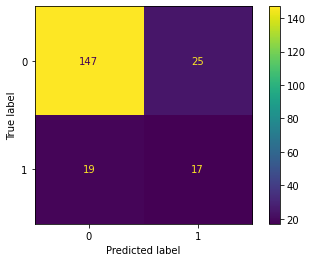

In [76]:
train_fit_check(rfc,X_train,y_train)
test_fit_check(rfc,X_test,y_test)
rfc_result=print_op(rfc)
Confusion_matrix(rfc,rfc_result)

In [70]:
rfc_result['Change Open-Close($)'].describe()

count    208.000000
mean       0.169952
std        1.773931
min       -5.250000
25%       -0.552500
50%        0.000000
75%        0.500000
max       11.250000
Name: Change Open-Close($), dtype: float64

In [77]:
rfc_result[rfc_result['Predicted']==1]['Change Open-Close($)'].describe()

count    42.000000
mean      0.859286
std       3.234217
min      -5.250000
25%      -1.402500
50%       0.380000
75%       2.590000
max      11.250000
Name: Change Open-Close($), dtype: float64

In [82]:
import pickle

In [79]:
with open('model_pkl', 'wb') as files:
    pickle.dump(rfc, files)

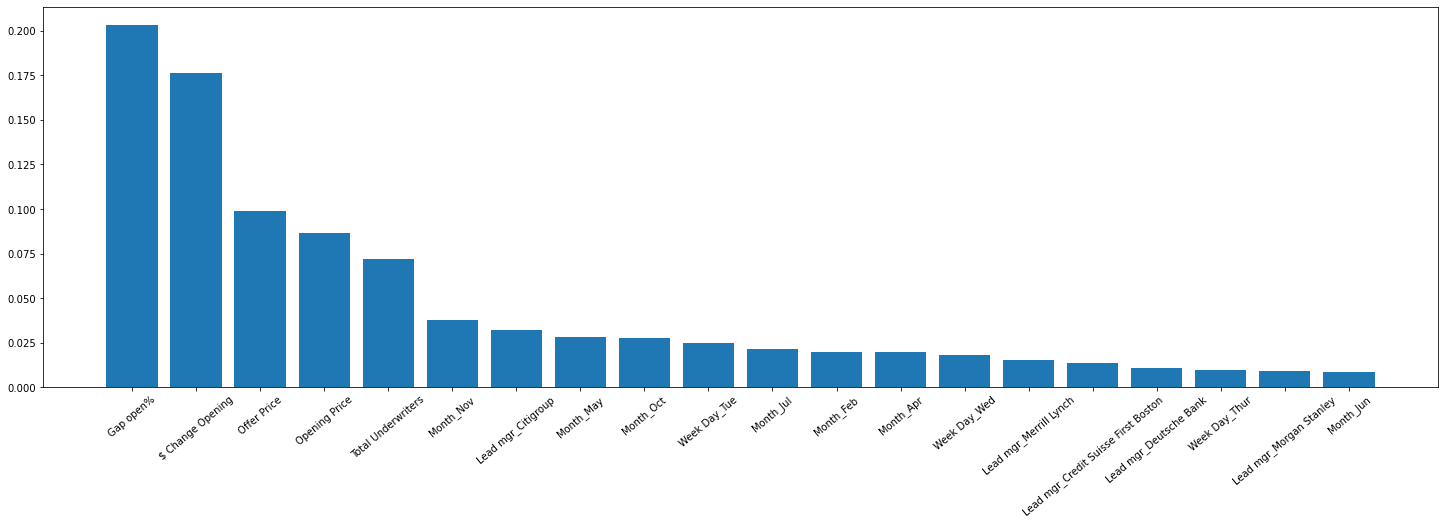

In [72]:
f_imp=list(rfc.feature_importances_)
zipped=list(zip(X_train.columns,f_imp))
zipped=sorted(zipped,key=lambda x:x[1],reverse=True)
f_imp=dict(zipped)
top_20_features=zipped[:20]
top_20_features=dict(top_20_features)
labels=list(top_20_features.keys())
fimp=list(top_20_features.values())
plt.figure(figsize=(25,7))
plt.bar(labels,fimp)
plt.xticks(rotation=40,)
plt.show()

In [73]:
useless_features=[]
for key in f_imp.keys():
    if f_imp[key]<=0:
        useless_features.append(key)

In [74]:
X_train_new=X_train.drop(columns=useless_features)
X_test_new=X_test.drop(columns=useless_features)
X_training_new=X_training.drop(columns=useless_features)